In [1]:
# 1 Import the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')



In [3]:
# 3 First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
def snake_case(x):
    x = x.replace(' ', '_').lower()
    print(x)
    return x
    
snake_case('Customer Lifetime Value')

customer_df.columns = customer_df.columns.map(snake_case)

customer_lifetime_value
customer
state
customer_lifetime_value
response
coverage
education
effective_to_date
employmentstatus
gender
income
location_code
marital_status
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
policy_type
policy
renew_offer_type
sales_channel
total_claim_amount
vehicle_class
vehicle_size


In [8]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
# 5 Change effective to date column to datetime format.
def convert_into_date(x):
    return pd.to_datetime(x, format='%m/%d/%y')

customer_df['effective_to_date'] = customer_df['effective_to_date'].map(convert_into_date)

In [10]:
customer_df['effective_to_date']
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
# 6 Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

numerical_df = customer_df.select_dtypes(include='number')

In [12]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [13]:
# 7 Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

for column in numerical_df.columns:
    print(column, numerical_df[column].nunique())

customer_lifetime_value 8041
income 5694
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
total_claim_amount 5106


In [14]:
def cat_cont_discrete(x):
    continuous_df_col = []
    discrete_df_col = []

    for column in numerical_df.columns:
        if numerical_df[column].nunique() > 20:
            continuous_df_col.append(column)
        else:
            discrete_df_col.append(column)
    
    cont = numerical_df[continuous_df_col]
    discrete = numerical_df[discrete_df_col]
    
    return cont, discrete


continuous_df, discrete_df = cat_cont_discrete(numerical_df)

In [15]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [16]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


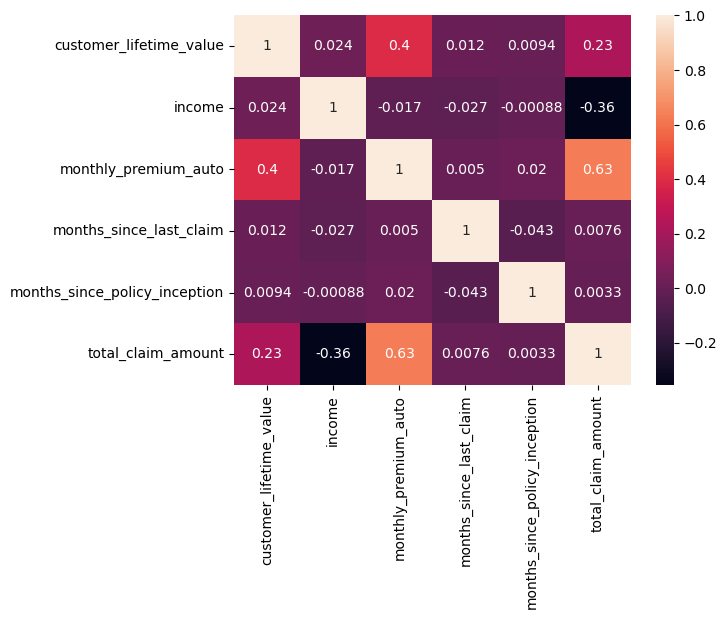

In [17]:
# 8 Plot a correlation matrix, comment what you see.
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# I do not see any too high correlation among features, I do not think I should drop something

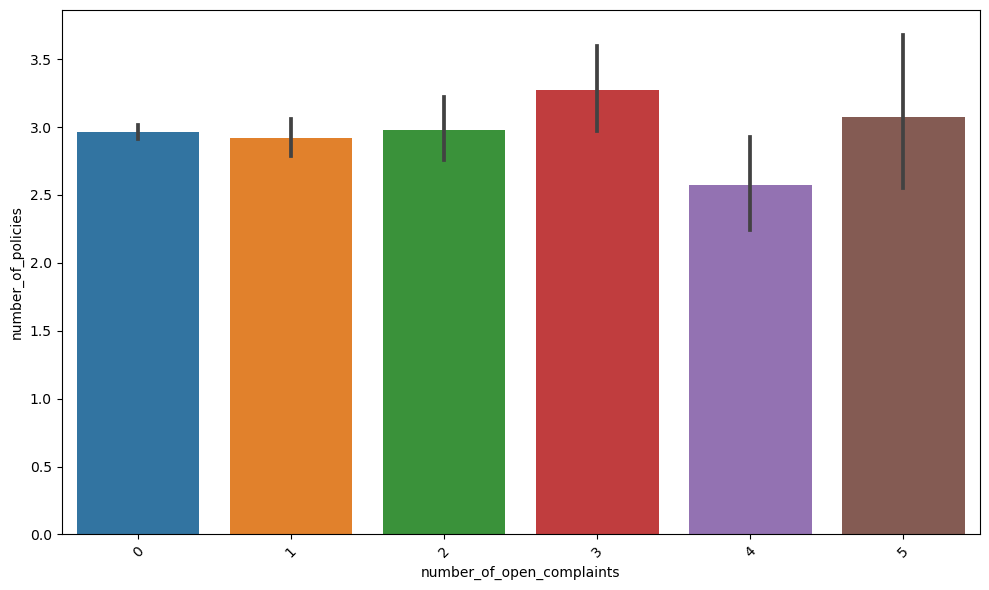

In [18]:
# 9 Create a function to plot every discrete variable. Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

plt.figure(figsize=(10, 6))
sns.barplot(data=discrete_df, x='number_of_open_complaints', y='number_of_policies')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

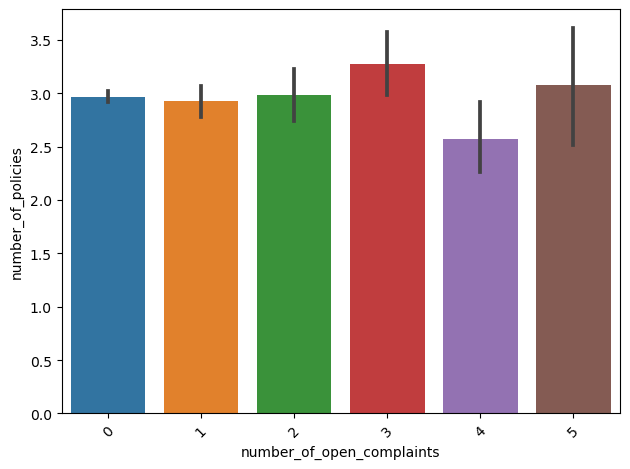

In [19]:
sns.barplot(data=discrete_df, x='number_of_open_complaints', y='number_of_policies')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
# 10 Comment what you can see in the plots.
# They do not seem to be correlated either among features neither with the target

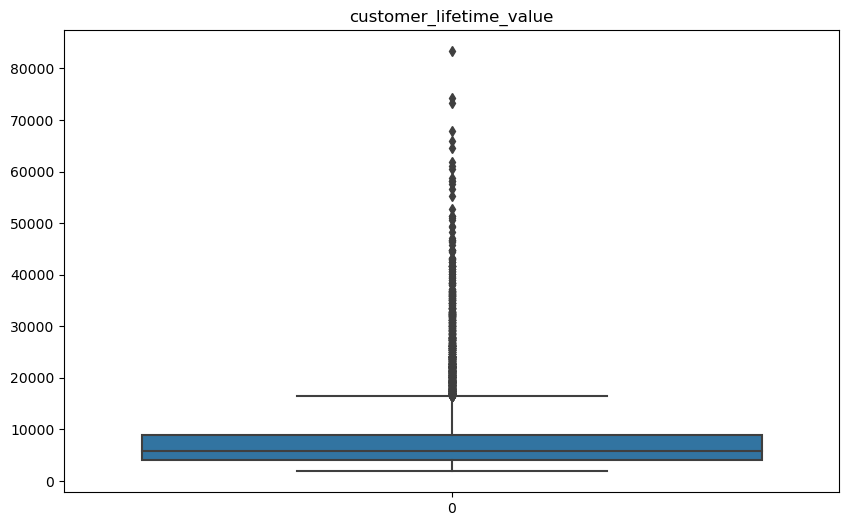

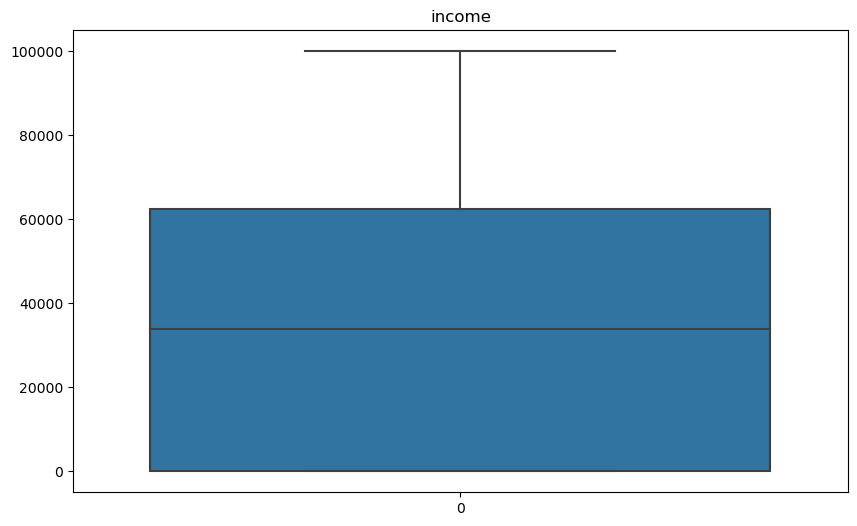

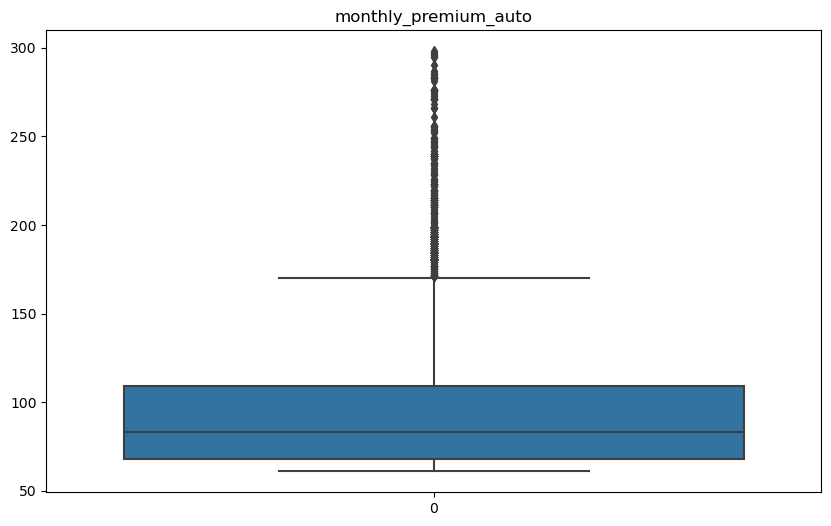

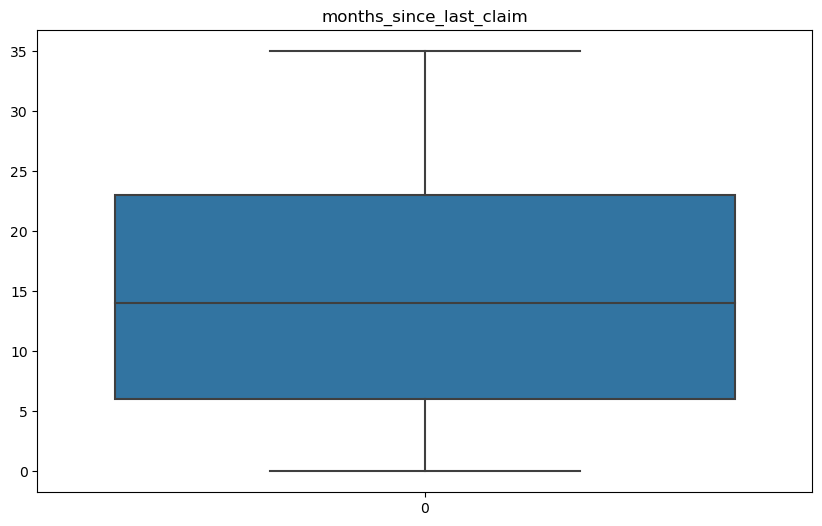

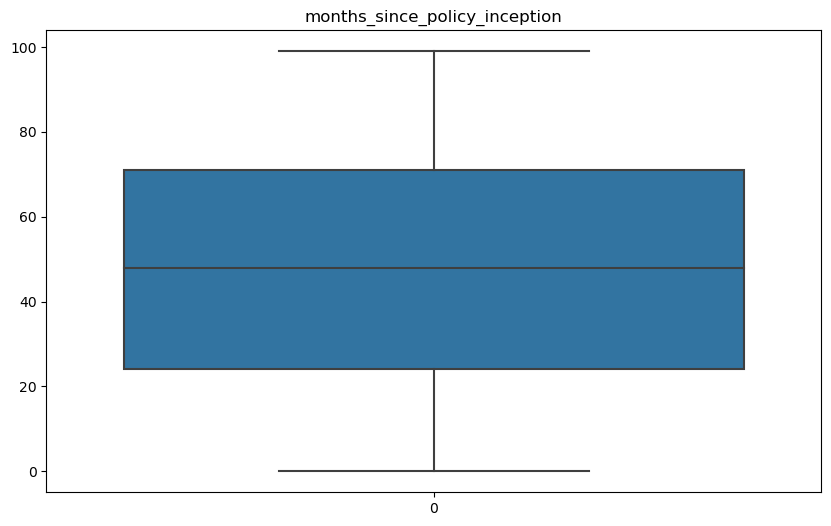

In [ ]:
# 11 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

for col in continuous_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=continuous_df[col])
    plt.title(col)
    plt.show()

In [ ]:
customer_df

In [ ]:
for col in discrete_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=discrete_df[col])
    plt.title(col)
    plt.show()

In [ ]:
# 11 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 12 Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

# I can see outliers for both customer_life_time_value and total_claim_amount.
# I will not delete any outlier for the target, there are a few outliers in customer_life_time_value
# I am convinced of dropping the, though. They are few and will not have a big impact on my model.

# customer_df['customer_lifetime_value']

# top_limit = customer_df['customer_lifetime_value'].quantile(0.95)
# customer_df = customer_df[customer_df['customer_lifetime_value'] <= top_limit]
# continuous_df = continuous_df[continuous_df['customer_lifetime_value'] <= top_limit]


In [ ]:
customer_df

In [ ]:
# 13 Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

customer_df.isna().value_counts().T

In [ ]:
# I do not find any nan

numerical_df.isna().sum()

In [ ]:
# 14 Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_df.to_csv('numerical_data.csv', index=False)


PART 2 -- CATEGORICALS

In [ ]:
# 1 Open the notebook created for Lab-cleaning-numerical-data.
# 2 Find all of the categorical data. Save it in a categorical_df =  variable.

categorical_df = customer_df.select_dtypes(include='object')

In [ ]:
# 3 Check for NaN values and decide what to do with them, do it now.

categorical_df.isna().sum()

# I do not see any NaN values

In [ ]:
# 4 Check all unique values of columns.

for col in categorical_df.columns:
   print(categorical_df[col].value_counts(dropna=False)) 


In [ ]:
# 5 Check dtypes. Do they all make sense as categorical data?

categorical_df.dtypes

# Yes, they are all objects (string)

In [ ]:
# 6 Does any column contain alpha and numeric data? Decide how to clean it and do it now.

categorical_df.head()

In [ ]:
# The columns that are alphanumerical are the following: customer, policy, renew_offer_type

categorical_df['renew_offer_type'].unique()

In [ ]:
# There is no use in treat customer the colum will be dropped, same for renew_offer_type because
# it will be anyone encoded. I will treat only policy becuase it has redundad info (in common with policy_type)

In [ ]:
def get_number_at_the_end(x):
    return x[len(x) - 1]

categorical_df['policy'] = categorical_df['policy'].apply(get_number_at_the_end)

In [ ]:
categorical_df

In [ ]:
# 8 Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# policy and policy_type provide the same information. I will drop policy type. I do not see any other obvious things to be cleaned

categorical_df.drop('policy_type', axis=1, inplace=True)

In [ ]:
categorical_df['vehicle_size'].unique()

In [ ]:
# 7 Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
for col in categorical_df.columns:
    display(categorical_df[col].value_counts())

In [ ]:
def group_high_edu(x):
    if x in ['Master', 'Doctor']:
        return 'Master or Above'
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(group_high_edu)


In [ ]:
categorical_df.head(50)

In [ ]:
def group_luxury_car(x):
    if x in ['Luxury SUV', 'Luxury Car']:
        return 'Luxury Car'
    else:
        return x

categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(group_luxury_car)

In [ ]:
display(categorical_df['vehicle_class'].value_counts())

In [ ]:
display(categorical_df['education'].value_counts())

In [ ]:
# 10 Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

categorical_df.to_csv('categorical.csv', index=False)